# EA.01: Modellierung von GA
1. Färbeproblem mit 5 verschiedenen Farben, 
    Ziel: Konfliktfreie Färbung mit einer minimalen Anzahl an Farben. 

2. 8-Queens-Problem 

Geben Sie an:  
- Geeignete Kodierung der Individuen 
- passende Operatoren wie Crossover oder Mutation 
- Fitnessfunktion

-> Begründen Sie Ihre Wahl!

Was würden Sie noch benötigen um die Probleme mit Simulated Annealing lösen zu können? 

## Färbeproblem 

1. Codierung der Individuen mit einem Array, das die Farben angibt: [A, B, C, D, E, F] (R, G, B, Y, M)

2. Es soll einen Crossover zwischen den Eltern geben mit einer Wahrscheinlichkeit von 60%. Trennung an zufälliger Stelle
    - Außerdem soll es Mutation geben, bei dem die Mutationswahrscheinlichkeit bei jedem Gen eines Individuum 0.01 beträgt. 
    - Alternativ könnte die mutationsrate auch 1/6 betragen

3. Die Fitnessfunktion hat eine Sekundäre und Primäre Bedingung.
    - Primäre Bedingung: Minimale Anzahl an Farben 
    - Sekundäre Bedingung: Konfliktfreie Färbung 
    - (-10\*n_f) + (-2\*n_k)
    - n_f = Anzahl der insgesamten Farben 
    - n_k = Anzahl der Konflikte bei der Färbung
    - max. fitness = -15


## 8-Queens-Problem
_Kann ich die Anzahl der Damen so Kontrollieren oder soll ich das durch die Fitnessfunktion geben?_


1. Codierung der Individuen durch ein Spielfeld in dem die Königinnen schon gesetzt sind. Da nur eine Königin pro Reihe existieren kann wird auch nur eine Königin pro Reihe gesetzt. Die 1-8 geben die Stelle in der Reihe an. [1, 2, 3, 4, 5, 6, 7, 8] (1-8) 

2. Crossover mit 60% Wahrscheinlichkeit. Dabei soll die Trennung an einer zufälligen Stelle geschehen. 
    - Mutation mit einer Wahrscheinlichkeit von 0.01 oder 1/8

3. Die Fitnessfunktion 
    - -1, wenn eine Königin in der Nähe 
    - -1, wenn gleiche Zahl vorhanden, da diese beiden sich dann treffen können.
    - (-1\*n_n) + (-1\*n_r)
    - n_n = Anzahl der Königinnen in der Nähe
    - n_r = Anzahl der Königinnen in der gleichen Reihe 
    - max. fitness = 0 


## Was würden Sie noch benötigen, um die obigen Probleme jeweils mit Simulated Annealing lösen zu können?
- Es müsste noch festgelegt werden wie die fittesten Individuuen ausgewählt werden. 
- Dabei könnte man die Roulette-Selektion oder die Turnier-Selektion nehmen 


In [1]:
import random as r
import matplotlib.pyplot as plt


class ea_modell:
    nukleoide = []
    max_fitness=0

    def __init__(self, max_gen: int = 100, n_pop: int = 100, n_tournaments = 10, tournament_size = 10, recombination_probability = 60, mutation_probability = 1):
        self.max_gen = max_gen
        self.n_pop = n_pop
        self.n_tournaments = n_tournaments
        self.tournament_size = tournament_size
        self.recombination_probability = recombination_probability
        self.mutation_probability = mutation_probability

    def init_population(self):
        self.population = [self.create_individual() for i in range(self.n_pop)]

    def create_individual(self):
        return []

    def fitness(self, individual: list): 
        return 1.0
    
    def recombination(self, parent1: list, parent2: list):
        if len(parent1) != len(parent2): 
            raise
        if r.randint(1,100) <= self.recombination_probability: 
            return parent1, parent2
        
        child1 = parent1.copy()
        child2 = parent2.copy()
        #zufällig trennen 
        cut = r.randint(1, len(parent1)-1)
        #Gene tauschen 
        for i in range(cut):
            child1[i] = parent2[i]
            child2[i] = parent1[i]
    
        return child1, child2
    
    def mutation(self, individual: list):
        #Chance von 0.01
        mutated = individual.copy()
        for i in range(len(individual)): 
            if r.randint(1,100) <= self.mutation_probability: 
                mutated[i] = r.choice(self.nukleoide)
        return mutated 

    def selection(self):
        mating_pool = []
        tournament_pool = []

        for i in range(self.n_tournaments): 
            for j in range(self.tournament_size):
                tournament_pool.append(r.choice(self.population))

            fittest_individual = tournament_pool[0]

            for j in tournament_pool:
                if self.fitness(j) > self.fitness(fittest_individual):
                    fittest_individual = j
            tournament_pool = []
            mating_pool.append(fittest_individual)
        
        return mating_pool
    
    def let_the_games_begin(self): 
        self.init_population()
        curr_gen = 0
        new_population = []
        fitness_curve = []
        solution_found = False
        while self.max_gen > curr_gen: 
            population_fitness = [self.fitness(i) for i in self.population]
            fitness_curve.append(max(population_fitness))

            # 2. Abbruchbedingung 
            if 1.0 in population_fitness: 
                #print("Lösung gefunden:" + str(self.population[population_fitness.index(self.max_fitness)]))
                #print("nach: "+ str(curr_gen) +" Generationen")
                solution_found = True
                break
            # Selection 
            mating_pool = self.selection()

            # Recombination
            for i in range(int(self.n_pop/3)):
                x,y = self.recombination(r.choice(mating_pool), r.choice(mating_pool))
                new_population.append(x)
                new_population.append(y)
            
            # Population auffüllen
            for i in range(int(self.n_pop/3)):
                new_population.append(self.create_individual())

            # Mutation
            new_population = [self.mutation(i) for i in new_population]
            
            self.population = new_population.copy()
            new_population = []
            curr_gen+=1
        return (curr_gen, solution_found, fitness_curve)

class Faerbeproblem(ea_modell): 

    nukleoide = ["R", "G", "B", "Y", "M"]
    max_fitness=1.0
    

    def __init__(self, max_gen: int = 100, n_pop: int = 100, n_tournaments = 10, tournament_size = 10, recombination_probability = 60, mutation_probability = 1):
        super().__init__(max_gen, n_pop, n_tournaments, tournament_size, recombination_probability, mutation_probability)

    def create_individual(self):
        return [r.choice(self.nukleoide) for i in range(6)]

    def fitness(self, individual: list): 
        """Determines the fitness for one individual"""
        n_f = len(set(individual))
        #Constraints: A/=B,  A/=C, B/=C, B/=D, C/=D, D/=E
        constraints = {(0,1), (0,2), (1,2), (1,3), (2,3), (3,4)}

        n_k = 0
        for i in constraints:
            if individual[i[0]] == individual[i[1]]:
                n_k+=1
        
        #Maximale Fitness ist 15
        return 15 /(n_k*6 + n_f*5)

    
    



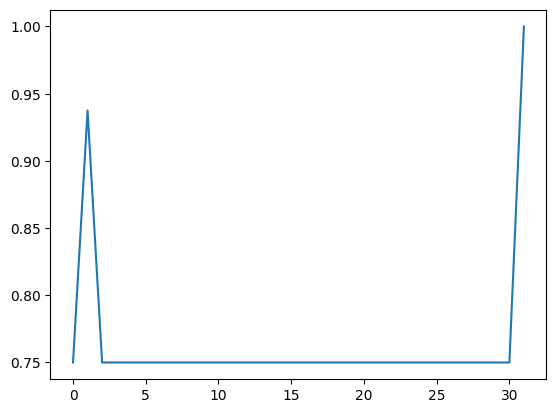

In [2]:
f = Faerbeproblem(n_pop=10, tournament_size=5, n_tournaments=5)
f.fitness(['B', 'B', 'M', 'G', 'B', 'G'])
n_gen, solution_found, fitness_curve_f = f.let_the_games_begin()
plt.plot(fitness_curve_f)

In [3]:

class EightQueensProblem(ea_modell):

    nukleoide = [1,2,3,4,5,6,7,8]
    max_fitness = 1.0

    #gleicher Constructor, da gleiche Einstellungsmöglichkeiten
    def __init__(self, max_gen: int = 100, n_pop: int = 100, n_tournaments = 10, tournament_size = 10, recombination_probability = 60, mutation_probability = 1):
        super().__init__(max_gen, n_pop, n_tournaments, tournament_size, recombination_probability, mutation_probability)

    

    def create_individual(self):
        return [r.choice(self.nukleoide) for i in range(8)]

    def fitness(self, individual: list[int]):
        # Doppelte Zahlen -> Königinnen in einer Reihe 
        n_r = 0
        for i in individual: 
            if individual.count(i) > 1: 
                n_r += 1
        
        n_d = 0
        # Vergleiche alle Königinnen miteinander ob diese diagonal zueinander stehen
        for i in range(len(individual)): #i = aktuell zu untersuchende Königin
            for j in range(len(individual)): #j = absolute Position der anderen Königin
                if i != j:
                    if individual[j] == individual[i]-abs(i-j): #abs(i-j) relative Position der anderen Königin 
                        n_d +=1

        return 1 / (1*n_r + 2*n_d +1)

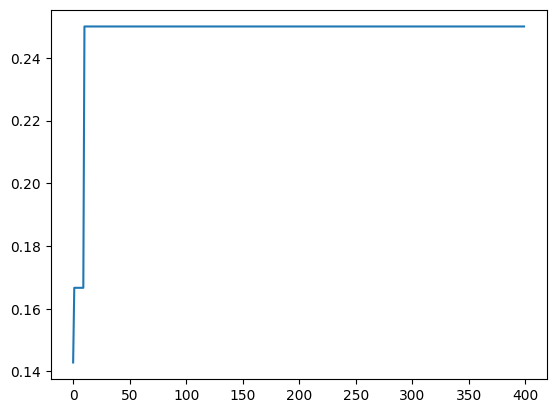

In [4]:
test = EightQueensProblem(max_gen=400, n_pop=15)
n_gen, solution_found, fitness_curve = test.let_the_games_begin()
plt.plot(fitness_curve)

# Untersuchung bekannter Kennzahlen 
**Kenngrößen:**
- Populationsgröße 
- Mutationswahrscheinlichkeit 
- Rekombinationswahrscheinlichkeit
- Turniergröße 
- Anzahl der Turniere

Es gibt noch die Kenngröße von der Anzahl der Nachfahren, allerdings weiß ich nicht wie ich das mit einbauen soll. Kommt in meinem Code halt nicht vor.

**Bewertungskritierien:**
- Gewschdingigkeit AES
- Lösungswahrscheinlichkeit SR 

- AES = Summe der Generationen aller Erfolgreichen Läufe/ Anzahl der Erfolgreichen Läufe
- SR  = Anzahl der erfolgreichen Läufe/ Anzahl aller Läufe 


Um eine Vergleichbarkeit zu Gewährleisten sind die im Konstruktor angegebenen Werte die Standardwerte und es wird nur die Jeweilige Kenngröße verändert. 
Es werden mit jeder Einstellung 100 Läufe durchgeführt und die Ergebnisse werden gemittelt. 

In [5]:
def calculate_metrics(data): 
    n_solutions = 0
    n_gen_solutions = 0
    n_runs = 0
    for n_gen, solution_found, _ in data:
        n_runs +=1
        if solution_found: 
            n_solutions += 1
            n_gen_solutions += n_gen

    aes = n_gen_solutions / n_solutions
    sr = n_solutions / n_runs

    return aes, sr

In [6]:
# Standardeinstellungen, Färbeproblem 
data = []
for i in range(100): 
    f = Faerbeproblem()
    data.append(f.let_the_games_begin())
calculate_metrics(data)

(0.13, 1.0)

In [7]:
# Standardeinstellungen, 8-Queens-Problem
data = []
for i in range(100): 
    f = EightQueensProblem()
    data.append(f.let_the_games_begin())
calculate_metrics(data)

(37.142857142857146, 0.21)

- Die Standardeinstellungen sorgen beim Faerbeproblem zu einer Geschwindigkeit von 0.13 mit einer Lösungswahrscheinlichkeit von 1.0. Das ist natürlich Verwunderlich, aber in den meisten Fällen wurde unter der initial Population schon eine Lösung gefunden. 
- Beim 8-Queens-Problem sieht das ganze schon verteilter aus. Mit einer Geschwindigkeit von 37.1428 und einer Lösungswahrscheinlichkeit von 0.21
- -> Die Zahlen dieser Versuche dienen als Vergleichsdaten für die restlichen Versuche 

In [8]:
# Populationsgröße 10, 50, 150, Färbeproblem 
data = []
for n_pop in [10, 50, 150]:
    for i in range(100): 
        f = Faerbeproblem(n_pop=n_pop)
        data.append(f.let_the_games_begin())
    print(calculate_metrics(data))

(6.69, 1.0)
(3.63, 1.0)
(2.4233333333333333, 1.0)


In [9]:
# Populationsgröße 10, 50, 150, 8-Queens-Problem 
data = []
for n_pop in [10, 50, 150]:
    for i in range(100): 
        f = EightQueensProblem(n_pop=n_pop)
        data.append(f.let_the_games_begin())
    print(calculate_metrics(data))

(40.5, 0.02)
(50.77272727272727, 0.11)
(41.13953488372093, 0.14333333333333334)


| Populationsgröße | Färbeproblem - AES|Färbeproblem - SR| 8-Queens-Problem - AES| 8-Queens-Problem - SR|
|------------------|--------------|------------------|-----------|----------|
|10| 6.69 | 1.0 | 40.5 | 0.02 | 
|50| 3.63 | 1.0 | 50.77| 0.11 |
|150| 2.423333 | 1.0 | 41.13 | 0.143|

- Das Färbeproblem hat mit ansteigender Populationsgröße eine immer höhere Geschwindigkeit. Das liegt daran, dass bei einer höheren Population die Wahrscheinlichkeit größer ist, dass ein Individuum mit der richtigen Lösung schon dabei ist.
- Bei dem 8-Queens-Problem lässt sich deutlich erkennen, dass die geringe Populationsgröße zu einer weitaus geringeren Lösungswahrscheinlichkeit führt. Wahrscheinlich ist der Selektionsdruck nicht groß genug oder die insgesamt kleine Auswahl an Individuuen hat zu weniger Mutation geführt oder die Population hat sich zu schnell einander angeglichen und kam so früh in eine lokales Minimum

In [10]:
# Mutationswahrscheinlichkeit 0.01%, 0.1%, 5%, Färbeproblem 
data = []
for mutation_probability in [0.01, 0.1, 5]:
    for i in range(100): 
        f = Faerbeproblem(mutation_probability=mutation_probability)
        data.append(f.let_the_games_begin())
    print(calculate_metrics(data))

(0.17, 1.0)
(0.165, 1.0)
(0.15666666666666668, 1.0)


In [11]:
# Mutationswahrscheinlichkeit 0.01%, 0.1%, 5%, 8-Queens-Problem 
data = []
for mutation_probability in [0.01, 0.1, 5]:
    for i in range(100): 
        f = EightQueensProblem(mutation_probability=mutation_probability)
        data.append(f.let_the_games_begin())
    print(calculate_metrics(data))

(25.5, 0.02)
(41.285714285714285, 0.035)
(27.28, 0.16666666666666666)


| Mutationswahrscheinlichkeit | Färbeproblem - AES|Färbeproblem - SR| 8-Queens-Problem - AES| 8-Queens-Problem - SR|
|------------------|--------------|------------------|-----------|----------|
| 0.01 | 0.17 | 1.0 | 25.5 | 0.02 |  
| 0.1 | 0.165 | 1.0 | 41.28 | 0.035 | 
| 5 | 0.1566 | 1.0 | 27.28 | 0.1666 | 

- Die geringere Mutationswahrscheinlichkeit führt zu einem geringeren "Schütteln" der Simulationslandschaft 
- Beim Färbeproblem wird mit steigender Mutationswahrscheinlichkeit die Wahrscheinlichkeit, dass die Zufälligkeit der nächsten Generationen direkt eine richtige Lösung hervorbringt, höher. Somit sehen wir eine steigende Geschwindigkeit 
- Beim 8-Queens-Problem ist es Interessant anzusehen, dass mit einer sehr geringen Mutationswahrscheinlichkeit die Lösungswahrscheinlichkeit sehr viel niedriger ist. Es lässt sich daraus schließen, dass der Algorithmus auch hier schnell in lokale Minima verfällt. Dazu passt auch die schnelle Geschwindigkeit. Entweder findet der Algorithmus schnell eine Lösung oder gar nicht. 
- Allerdings zeigen die Ergebnisse auch, dass ein zu starkes "Schütteln" nicht förderlich ist. Die Ergebnisse werden mehr Zufällig und es kann sein, dass gute Kandidaten durch Mutation zerstört werden.

In [12]:
# Rekombinationswahrscheinlichkeit 20%, 40%, 80%, Färbeproblem 
data = []
for recombination_probability in [20, 40, 80]:
    for i in range(100): 
        f = Faerbeproblem(recombination_probability=recombination_probability)
        data.append(f.let_the_games_begin())
    print(calculate_metrics(data))

(0.09, 1.0)
(0.085, 1.0)
(0.1, 1.0)


In [13]:
# Rekombinationswahrscheinlichkeit 20%, 40%, 80%, 8-Queens-Problem 
data = []
for recombination_probability in [20, 40, 80]:
    for i in range(100): 
        f = EightQueensProblem(recombination_probability=recombination_probability)
        data.append(f.let_the_games_begin())
    print(calculate_metrics(data))

(20.566666666666666, 0.3)
(26.20689655172414, 0.29)
(26.68918918918919, 0.24666666666666667)


| Rekombinationswahrscheinlichkeit | Färbeproblem - AES|Färbeproblem - SR| 8-Queens-Problem - AES| 8-Queens-Problem - SR|
|------------------|--------------|------------------|-----------|----------|
| 20 | 0.09 | 1.0 | 20.56 | 0.3 | 
| 40 | 0.085 | 1.0 | 26.20 | 0.29 | 
| 80 | 0.1 | 1.0 | 26.68 | 0.2466 | 

- Beide Algorithmen schneiden bei einer geringeren Rekombinationswahrscheinlichkeit besser ab. 
- Das lässt darauf schließen, dass bei den Algorithmen vorher nicht genügend gute Eltern wieder in die Population zurück gekommen sind. Besonders fällt mir auf, dass die Geschindigkeit vom 8-Queens-Problem relativ schnell ist. 

In [14]:
# Turniergröße 3, 20, 40, Färbeproblem 
data = []
for tournament_size in [3, 20, 40]:
    for i in range(100): 
        f = Faerbeproblem(tournament_size=tournament_size)
        data.append(f.let_the_games_begin())
    print(calculate_metrics(data))

(0.1, 1.0)
(0.11, 1.0)
(0.14, 1.0)


In [15]:
# Turniergröße 3, 20, 40, 8-Queens-Problem 
data = []
for tournament_size in [3, 20, 40]:
    for i in range(100): 
        f = EightQueensProblem(tournament_size=tournament_size)
        data.append(f.let_the_games_begin())
    print(calculate_metrics(data))

(44.75, 0.24)
(35.3469387755102, 0.245)
(33.69620253164557, 0.2633333333333333)


| Turniergröße | Färbeproblem - AES|Färbeproblem - SR| 8-Queens-Problem - AES| 8-Queens-Problem - SR|
|------------------|--------------|------------------|-----------|----------|
| 3 | 0.1 | 1.0 | 44.75 | 0.24 |
| 20 | 0.11 | 1.0 | 35.34 | 0.245 |
| 40 | 0.14 | 1.0 | 33.69 | 0.263 | 

- Mit der Turniergröße kann man gut den Selektionsdruck einstellen. 
- Man sieht, dass bei einem geringen Selektionsdruck beim 8-Queens-Problem die Geschwindigkeit zunimmt. 

In [16]:
# Anzahl der Turniere 3, 20, 40, Färbeproblem 
data = []
for n_tournaments in [3, 20, 40]:
    for i in range(100): 
        f = Faerbeproblem(n_tournaments=n_tournaments)
        data.append(f.let_the_games_begin())
    print(calculate_metrics(data))

(0.25, 1.0)
(0.16, 1.0)
(0.14, 1.0)


In [17]:
# Anzahl der Turniere 3, 20, 40, 8-Queens-Problem 
data = []
for n_tournaments in [3, 20, 40]:
    for i in range(100): 
        f = EightQueensProblem(n_tournaments=n_tournaments)
        data.append(f.let_the_games_begin())
    print(calculate_metrics(data))

(41.0, 0.22)
(38.15686274509804, 0.255)
(33.78947368421053, 0.25333333333333335)


| Anzahl der Turniere | Färbeproblem - AES|Färbeproblem - SR| 8-Queens-Problem - AES| 8-Queens-Problem - SR|
|------------------|--------------|------------------|-----------|----------|
| 3 | 0.25 | 1.0 | 41.0 | 0.22 | 
| 20 | 0.16 | 1.0 | 38.156 | 0.255 |
| 40 | 0.14 | 1.0 | 33.78 | 0.253 | 

- Mit der Anzahl der Turniere erhöht sich die Anzahl an gleichen Eltern, da die besten Individuuen öfter ausgewählt werden. 
- Somit wird die Population weniger divers. Das kann zu lokalen Minima führen. 
- Das lässt sich daran sehen, dass die Geschwindigkeit des 8-Queens-Problems schneller wird. 
- Weil die besten Individuen schnell ausgewählt werden und die Population sich in einem lokalen Minimum befindet. 